In [1]:
import os
import time
import pandas as pd
import numpy as np
import collections
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#os.getcwd()

## Read-in data

In [2]:
# Read Dataset
df = pd.read_csv('bank-additional.csv', sep=';')
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','y']]

# Label encode naively
columns_to_encode  = ['job','marital','education','contact','day_of_week','month','default','housing','loan','y']
le = preprocessing.LabelEncoder()
for column in columns_to_encode:
        df[column] = le.fit_transform(df[column])

## Statistical description of data

In [3]:
pd.concat([df.describe(include='all'), df.dtypes.to_frame().T])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
mean,40.1136,3.82496,1.17698,3.78029,0.195436,1.08157,0.348386,0.356154,4.29497,2.00971,0.109493
std,10.3134,3.60632,0.606341,2.14959,0.397196,0.983915,0.741647,0.47892,2.30519,1.38923,0.312294
min,18,0,0,0,0,0,0,0,0,0,0
25%,32,1,1,2,0,0,0,0,3,1,0
50%,38,3,1,3,0,2,0,0,4,2,0
75%,47,7,2,6,0,2,0,1,6,3,0
max,88,11,3,7,2,2,2,1,9,4,1
0,int64,int32,int32,int32,int32,int32,int32,int32,int32,int32,int32


In [4]:
df_ = pd.isna(df.values)
pd.DataFrame(df_, columns=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','y'])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# View data
df.iloc[0:10,:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,1,1,2,0,2,0,0,6,0,0
1,39,7,2,3,0,0,0,1,6,0,0
2,25,7,1,3,0,2,0,1,4,4,0
3,38,7,1,2,0,1,1,1,4,0,0
4,47,0,1,6,0,2,0,0,7,1,0
5,32,7,2,6,0,0,0,0,9,2,0
6,32,0,2,6,0,2,0,0,9,1,0
7,41,2,1,6,1,2,0,0,7,1,0
8,31,7,0,5,0,0,0,0,7,3,0
9,35,1,1,2,1,0,0,1,6,2,0


## Correlation Matrix

In [6]:
def Correlation_Matrix(X):
    
    corrB = X.corr()
    cmap = cmap =sns.diverging_palette(250, 15, s=75, l=40, as_cmap=True, center='dark')
    #sns.palplot(sns.color_palette("bright", 10))
    def magnify():
        return [dict(selector="th",
                     props=[("font-size", "7pt")]),
                dict(selector="td",
                     props=[('padding', "0em 0em")]),
                dict(selector="th:hover",
                     props=[("font-size", "12pt")]),
                dict(selector="tr:hover td:hover",
                     props=[('max-width', '200px'),
                            ('font-size', '12pt')])]

    corrmatrix = corrB.style.background_gradient(cmap, axis=1)\
        .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
        .set_caption("Hover to magify")\
        .set_precision(2)\
        .set_table_styles(magnify())
    return corrmatrix

corrmatrix = Correlation_Matrix(df)

In [7]:
corrmatrix

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
age,1,0.015,-0.39,-0.13,0.16,-0.0073,-0.0086,0.013,-0.021,-0.029,0.06
job,0.015,1,0.014,0.13,-0.04,0.0027,-0.0008,-0.012,-0.017,-0.0041,0.027
marital,-0.39,0.014,1,0.1,-0.082,0.0027,-0.0059,-0.067,-0.034,0.0072,0.044
education,-0.13,0.13,0.1,1,-0.2,0.03,-0.021,-0.12,-0.081,-0.042,0.067
default,0.16,-0.04,-0.082,-0.2,1,-0.012,0.0079,0.15,-0.0086,-0.015,-0.077
housing,-0.0073,0.0027,0.0027,0.03,-0.012,1,0.064,-0.073,-0.04,0.012,0.00096
loan,-0.0086,-0.0008,-0.0059,-0.021,0.0079,0.064,1,0.004,-0.024,0.0026,-0.013
contact,0.013,-0.012,-0.067,-0.12,0.15,-0.073,0.004,1,0.26,-0.0096,-0.14
month,-0.021,-0.017,-0.034,-0.081,-0.0086,-0.04,-0.024,0.26,1,0.034,0.005
day_of_week,-0.029,-0.0041,0.0072,-0.042,-0.015,0.012,0.0026,-0.0096,0.034,1,-0.0064


## Train_Test data split

In [24]:
# Create Training and Testing Data
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(collections.Counter(y_train),collections.Counter(y_test))

#Select numerical columns which need to be normalized
# train_norm = X_train[X_train.columns[0:1]]
# test_norm = X_test[X_test.columns[0:1]]

# # Normalise training data
# std_scale1 = preprocessing.StandardScaler().fit(train_norm)
# x_train_norm = std_scale1.transform(train_norm)
# training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns)
# X_train.update(training_norm_col)

# # Normalise testing data
# x_test_norm = std_scale1.transform(test_norm)
# testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns)
# X_test.update(testing_norm_col) # Update test data with normalised columns


# Train SVM Classifer
clf = svm.SVC(C=1, kernel='linear',degree=2,gamma='scale',probability=True)
%time clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)[:,1]
ytest = y_test.astype(np.float64)
ytest = ytest.values
predictions = test_pred.astype(np.float64)
train_accuracy = np.sum(train_pred==y_train)/y_train.shape[0] * 100
test_accuracy = np.sum(test_pred==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_accuracy))
print("Testing Accuracy: %.3f%%" % (test_accuracy))

tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print('tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)

Counter({0: 2563, 1: 320}) Counter({0: 1105, 1: 131})
Wall time: 806 ms
Training Accuracy: 88.900%
Testing Accuracy: 89.401%
tn: 1105 fp: 0 fn: 131 tp: 0


In [ ]:
pred_prob

In [ ]:
test_pred

## ROC

<Figure size 144x144 with 0 Axes>

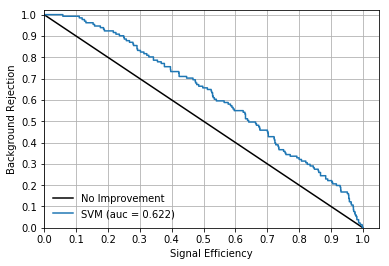

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
auc = auc(fpr,tpr)

plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr, tpr, label='SVM (auc = %0.3f)'%auc)
plt.ylabel('Background Rejection')
plt.xlabel('Signal Efficiency')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()

## Confusion Matrix

--- 0.00773310661315918 seconds ---
Automatically created module for IPython interactive environment
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


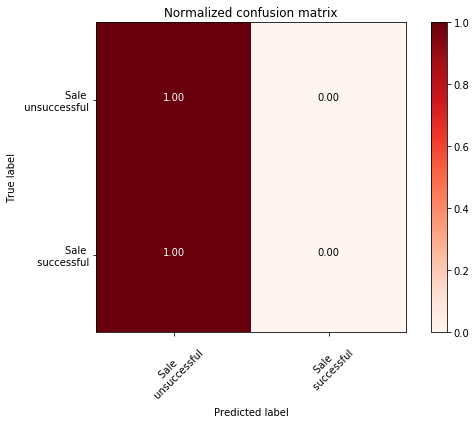

In [14]:
import itertools
from sklearn.metrics import confusion_matrix

start = time.time()

prediction_classes = []
for i in range(len(pred_prob)):
    r = round(pred_prob[i])
    prediction_classes.append(r)
    
end = time.time()  
prediction_classes = np.asarray(prediction_classes)
print("--- %s seconds ---" %(end - start))

print(__doc__)

class_names = ["Sale \n unsuccessful", "Sale \n successful"] #Sale unsuccessful Sale successful

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(ytest,prediction_classes)
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure(figsize=(8,6))
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix')

# Plot normalized confusion matrix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

### Note: 
This result is likely caused by bias from training on imbalanced data. Applying SMOTE could yield different results.